# Chap06 - 우선순위 바로잡기

# Getting our priorities straight

## 6.1 서론

이 장에서는 

> '적절한 사전확률분포를 어떻게 고를 것인가'

를 다룬다. 또한, 데이터셋이 커질수록 사전확률분포의 영향력이 어떻게 변화하는지 보여주고, 사전확률분포와 선형회귀의 패널티 간의 관계에 대해 알아본다. 

## 6.2 주관적인 사전확률분포 vs 객관적인 사전확률분포

베이지안 사전확률분포는 두 부류로 나눌 수 있다. 

1. **객관적인 사전확률분포**(objective priors)
    - 데이터가 사후확률분포에 최대한 영향을 미칠 수 있도록 하는 것이 목적
2. **주관적인 사전확률분포**(subjective priors)
    - 실무자가 사전확률분포에 자신의 견해를 반영하는 것

### 6.2.1 객관적인 사전확률분포

객관적인 사전확률분포의 예로 **균등분포**(uniform distribution)가 있다. 이러한 **평평한 사전확률분포**(flat prior)는 각각의 가능한 값에 동일한 비중을 부여할 수 있다. 이런 류의 사전확률 분포는 다음과 같은 **무차별성의 원리**(principle of indifference)이다.

> 어떤 값을 특별히 선호할 이유는 없다.

### 6.2.2 주관적인 사전확률분포

사전확률분포의 특정 영역이나 다른 곳에 확률질량(probability mass)을 추가한다면 더 많은 확률질량으로 그 영역에 존재하는 모수에 편향된 추론을 하게 되는데, 이러한 확률분포를 주관적인 사전확률분포라 한다.

In [2]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib

matplotlib.rc('font', family='NanumGothic')  # Linux
# matplotlib.rc('font', family='AppleGothic')  # Mac

figsize(12.5, 3)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

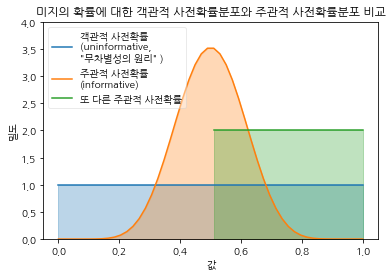

In [2]:
x = np.linspace(0, 1)
y1, y2 = stats.beta.pdf(x, 1, 1), stats.beta.pdf(x, 10, 10)

x = np.linspace(0, 1)
y1, y2 = stats.beta.pdf(x, 1, 1), stats.beta.pdf(x, 10, 10)

p = plt.plot(x, y1,
    label='객관적 사전확률\n(uninformative, \n"무차별성의 원리" )')
plt.fill_between(x, 0, y1, color=p[0].get_color(), alpha=0.3)

p = plt.plot(x, y2, label="주관적 사전확률\n(informative)")
plt.fill_between(x, 0, y2, color=p[0].get_color(), alpha=0.3)

p = plt.plot(x[25:], 2 * np.ones(25), label="또 다른 주관적 사전확률")
plt.fill_between(x[25:], 0, 2, color=p[0].get_color(), alpha=0.3)

plt.ylim(0, 4)
plt.ylim(0, 4)
leg = plt.legend(loc="upper left")
leg.get_frame().set_alpha(0.4)
plt.xlabel("값")
plt.ylabel("밀도")
plt.title("미지의 확률에 대한 객관적 사전확률분포와 주관적 사전확률분포 비교");

### 6.2.3 결정, 결정 ...

객관적인 사전확률분포나 주관적인 사전확률분포는 보통 해결하려는 문제에 따라 선택한다. 하지만, 객관적인 사전확률분포와 주관적인 사전확률분포 중 어느 것을 우선적으로 선택해야 하는 경우가 종종 있다. 예를 들어, 과학 연구의 경우 결과에 대한 편향을 제거해야 하므로 객관적인 사전확률분포를 선택하는 것이 당연하다.

> 모델이 적합한 이후에는 사후확률분포를 살펴보아야 하고, 이치에 맞는지 확인해야 한다. 만일 사후확률분포가 이치에 맞지 않는다면 모델에 포함되지 않은 사전 정보가 추가로 필요하다는 것을 의미한다. 그리고 이전에 사용한 사전확률분포의 가정에 위배된다는 것을 의미한다. 그래서 이전으로 돌아가 사전확률분포가 외부 정보와 조화되도록 변경하는 것이 적절하다. *-젤먼(Gelman)-*

사후확률분포가 우리가 생각한 것과 맞지 않다고 생각하는 것은 곧, 사후확률분포가 어떤 모습이어야 하는지 생각하고 있었으며, 현재의 사전확률분포가 모든 사전 정보를 갖고 있지 않고 업데이트가 필요하다는 것을 의미한다. 이 때 현재의 사전확률분포를 버리고 모든 사전 정보의 여러가지 면을 반영할 수 있다.

### 6.2.4 경험적 베이즈

**경험적 베이즈**(empirical Bayes)는 빈도주의와 베이지안 추론을 결합한 트릭이다. 베이지안과 경험적 베이즈 방법 간의 유의미한 차이는 바로 베이지안 방법은 하이퍼파라미터(hyperparameters) $\alpha$와 $\tau$인 사전확률분포를 갖지만, 경험적 베이즈 방법은 사전확률분포에 대한 어떠한 개념도 없다. 경험적 베이즈는 빈도주의 방법으로 $\alpha$와 $\tau$를 선택하고, 그런 다음 베이지안 방법으로 문제를 해결한다.

간단한 예는 다음과 같다. $\sigma = 5$인 정규확률분포의 모수 $\mu$를 추정하고 싶다고 하자. $\mu$의 범위는 실수이므로 정규확률분포를 $\mu$에 대한 사전확률분포로 사용할 수 있다. 그리고 사전확률분포의 하이퍼파라미터($\mu_p, \sigma_{p}^{2}$)를 선택해야 한다. 모수 $\sigma_{p}^{2}$는 우리가 가진 불확실성을 반영하도록 선택한다. $\mu_p$에 대해서는 다음 중 하나를 선택할 수 있다.

- 경험적 베이즈는 관측된 경험적 평균 주변에 사전확률분포의 중심을 맞추는 경험적 표본평균을 사용할 것을 권장한다.
$$
\mu_p = \frac{1}{N} \sum_{i=0}^{N}{X_i}
$$

- 전통적인 베이즈 추론은 사전적 지식 또는 여러 객관적인 사전확률분포(평균이 0이고 두터운 표준편차)를 사용할 것을 권장한다. 

객관적인 베이지안 추론에 비해 경험적 베이즈는 덜 객관적일 수 있다. 그 이유는 모수는 데이터를 통해 정해져서 객관적이라 할 수 있지만, 사전확률 모델은 사람이 선택하므로 주관적이기 때문이다.

이 책의 저자는 경험적 베이즈 방법은 **데이터를 중복 계산**하고 있다고 말한다. 그 이유는 관측 데이터의 결과에 영향을 준 데이터를 사전확률분포에서 한번 사용하고, MCMC를 이용해 추론할 때 또 한번 사용하기 때문에 불확실성을 과소평가할 수 있기 때문이다. 

이러한 이유로 저자는 데이터가 적을 경우 사전확률이 지나친 영향력을 가질 수 있어 데이터가 많을 때만 경험적 베이즈를 사용하라고 권한다. 또한 가능하면 $\sigma_{p}^{2}$를 크게하여 높은 불확실성을 유지할 것을 권한다.

경험적 베이즈는 베이지안 추론의 철학을 훼손하기도 한다. 다음과 같은

> 관측 데이터 → 사전확률 → 관측 데이터 → 사후확률

방식의 경험적 베이즈는 

> 사전확률 → 관측 데이터 → 사후확률

이라는 교과서적인 베이지안 알고리즘을 훼손하는 것이다. 이상적으로 모든 사전확률분포는 데이터를 과늑하기 전에 구체화되어야 한다.

## 6.3 알아두면 유용한 사전확률분포

다음으로 베이지안 분석과 방법에 공통으로 사용되는 몇몇 분포들을 알아보자.

### 6.3.1 감마분포

> [감마 분포](https://ko.wikipedia.org/wiki/%EA%B0%90%EB%A7%88_%EB%B6%84%ED%8F%AC)는 연속 확률분포로, 두 개의 매개변수를 받으며 양의 실수를 가질 수 있다. 감마 분포는 지수 분포나 푸아송 분포 등의 매개변수에 대한 [켤레 사전 확률 분포](http://egloos.zum.com/posterior/v/9624083)이며, 이에 따라 베이즈 확률론에서 사전 확률 분포로 사용된다.

감마확률변수($X \sim \text{Gamma}(\alpha, \beta)$)는 양의 실수에 대한 확률변수다. 감마확률변수는 지수확률변수(Exponential random variable)의 일반형이다. 

$$
\text{Exp}(\beta) \sim \text{Gamma}(1, \beta)
$$

$\text{Gamma}(\alpha, \beta)$의 확률변수의 밀도함수는 다음과 같다.

$$
f(x | \alpha, \beta) = \frac{\beta^{\alpha} x^{\alpha - 1} e^{-\beta x}}{\Gamma (\alpha)}
$$

여기서 $\Gamma (\alpha)$는 감마함수다. 아래의 예제는 $(\alpha, \beta)$의 여러 값에 대한 감마분포를 나타낸 것이다.

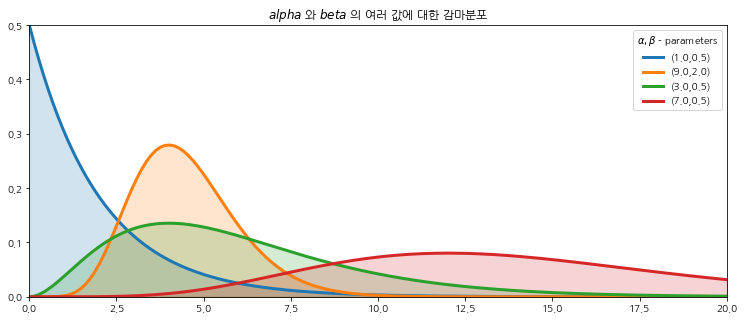

In [3]:
figsize(12.5, 5)
gamma = stats.gamma

parameters = [(1, 0.5), (9, 2), (3, 0.5), (7, 0.5)]
x = np.linspace(0.001, 20, 150)
for alpha, beta in parameters:
    y = gamma.pdf(x, alpha, scale=1. / beta)
    lines = plt.plot(x, y, label="(%.1f,%.1f)" % (alpha, beta), lw=3)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
    plt.autoscale(tight=True)

plt.legend(title=r"$\alpha, \beta$ - parameters");
plt.title("$alpha$ 와 $beta$ 의 여러 값에 대한 감마분포");

### 6.3.2 위샤트분포

이때까지 스칼라인 확률변수만 다루었다. 이번에는 랜덤행렬에 대해 알아보자. **위샤트분포**(Wishart distribution)는 모든 양의 [준정부호행렬](https://datascienceschool.net/view-notebook/d6205659aff0413797c22552947aec83/)에 대한 분포다. 

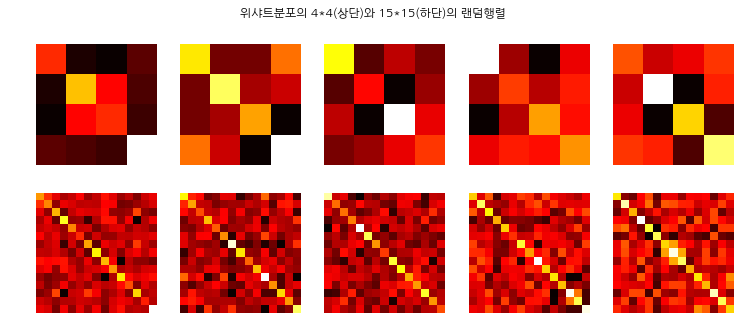

In [4]:
import pymc as pm

n = 4
hyperparameter = np.eye(n)
for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(pm.rwishart(n+1, hyperparameter), interpolation="none",
    cmap=plt.cm.hot)
    ax.axis("off")
n = 15
hyperparameter = 10*np.eye(n)
for i in range(5, 10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(pm.rwishart(n+1, hyperparameter), interpolation="none",
    cmap=plt.cm.hot)
    ax.axis("off")    
plt.suptitle("위샤트분포의 4*4(상단)와 15*15(하단)의 랜덤행렬");

### 6.3.3 베타분포

이 책의 저자는 예제 코드에서 베타분포를 종종 사용했다. 베타분포는 베이지안 통계에서 매우 유용하다. 밀도함수가 다음과 같은 경우 확률변수 $X$는 모수가 ($\alpha, \beta$)인 베타분포를 가진다. 

$$
\left( { x }|{ \alpha, \beta } \right) = \frac{x^{(\alpha - 1)} (1 - x)^{\beta - 1}}{B(\alpha, \beta)} 
$$ 

베타분포는 확률변수를 0 ~ 1 사이의 값을 가지고, 대표적인 확률 모델링 방법이다. $\alpha$와 $\beta$의 값 모두 양수이며, 아래와 같이 $\alpha$와 $\beta$에 따른 여러 모양이 있다. 아래의 그림 중 ($\alpha, \beta$)의 값이 ($1, 1$)인 평평한 분포는 바로 균등분포이다.

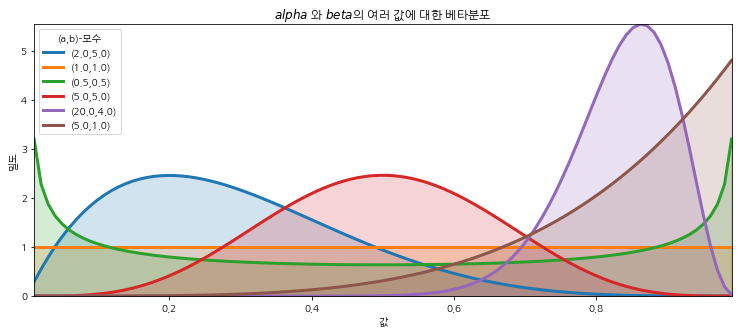

In [5]:
figsize(12.5, 5)
params = [(2,5), (1,1), (0.5, 0.5), (5, 5), (20, 4), (5, 1)]
x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label="(%.1f,%.1f)"%(a,b), lw = 3)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
    plt.autoscale(tight=True)
    
plt.ylim(0)
plt.legend(loc='upper left', title="(a,b)-모수")
plt.xlabel('값')
plt.ylabel('밀도')
plt.title("$alpha$ 와 $beta$의 여러 값에 대한 베타분포");

베타분포와	이항분포	간에는	흥미로운	연관성이	있다.	가령	우리가	미지의	확률	p에	관심을	가지고	있다고	하자.	Beta(α,	β)	사전확률을	p에	할당하고,	이항	과정에서	생겨나는	데이터를	관측한다.	즉,	p가	아직	미지수인	X	~	Binomial(N,	p)이다.	그러면	우리의	사후확률은	다시	베타분포다.	즉,	p|X	~	Beta(α	+	X,	β	+	N	-	X)이다.	간단하게	두	분포를	연관시킬	수	있다.	이항	관측치를	가진	베타사전분포는	베타사후분포를	만든다.	이것은	연산적인	측면에서나	경험적인	측면에서	매우	유용한	성질이다.
더	구체적으로,	만일	우리가	p(균등분포인)에	대한	Beta(1,	1)	사전분포로	시작하여	데이터	X	~	Binomial(N,	p)를	관측한다면	우리의	사후확률은	Beta(1	+	X,	1	+	N	-	X)다.	예를	들어	시행수	N	=	25에서	연속으로	X	=	10을	관측했다면	p의	사후확률은	Beta(1	+	10,	1	+	25	-	10)	=	Beta(11,	16)	분포다.

## 6.4 예제: 베이지안 MAB(Multi-Armed Bandits)

> 슬롯머신(형형색색의	Multi-Armed	 Bandits라고	 부른다)
이	열	대	있다고	하자.	각	기계는	상금을	획득할	수	있는	미지의	확률을	가지
고	있다(상금은	같고	오직	확률만	다르다).	어떤	기계는	확률이	후한	반면,	어
떤	것은	그렇지	않다.	물론	그	확률이	얼마인지	모른다.	 **매번	승률이
높을	것으로	예상되는	하나의	기계를	선택함으로써	우리의	전략은	승률을	극
대화하는	것이다. **

위의 예제에서 하나의 문제는 **탐색(exploration)과 활용(explotation)** 의 딜레마다. 만약 우리가 꽤 좋은 결과를 돌려주는 기계를 찾아냈다면 좋은 결과를 유지하기 위해 그 기계를 계속 사용할 것인지 아니면 더 좋은 결과를 얻을 거라는 희망으로 다른 기계를 찾아볼 것인지다.

- **암(arm)**: 검정하고자 하는 아이디어 한 개
- **밴디트(bandit)**: 검정하고자 하는 아이디어 묶음
- **시도(pull/play/trial)**: 아이디어 시험 한 번
- **보상(reward)**: 시험 후에 측정되는 결괏값

### 6.4.1 응용

위와 같은 문제는 다양한 분야에서 응용될 수 있다.

- **인터넷	디스플레이	광고**:	회사는	방문자에서	노출할	여러	광고안을	마련했지만	어느	광고	전략이	매출을	극대화할지는	모른다.	이것은	A/B	테스트와	유사하지만	성공하지	못할	광고안을	자연스럽게	줄여나가는	장점이 있다.
- **생태학**:	동물은	소모할	수	있는	에너지가	한정되어	있는데,	어떤	행동	또는	행위에	따라	얻는	보상은	불확실하다.	동물이 생존하려면	어떻게 해야	하는가?
- **금융**:	시간에	따라	수익률	프로파일이	달라지고	있는	상황에서	어떤	주식	옵션이	최고의	수익률을	줄	것인가?
- **임상실험**:	어느	연구원은	가능한	여러	가지	임상치료	실험	중	부작용을	최소화하는	최고의	임상치료는	무엇인지	알고	싶다.

최적의 솔루션을 찾기란 매우 어렵다. 이러한 문제의 솔루션 중 하나를 [**베이지안 밴디트(Bayesian Bandits)**](https://zedoul.github.io/blog/Bayesian-Multi-armed-bandit.html) 라 한다. 그럼 베이지안 밴디트에 대해 알아보자.

### 6.4.2 솔루션 제안

알고리즘은 아무것도 모르는 무지의 상태에서 시작한다. 그리고 시스템을 테스트하면서 데이터를 얻기 시작한다. 데이터와 결과를 얻을 때마다 최선의 행위가 무엇이고 최악의 행위가 무엇인지 배운다. 

베이지안 솔루션은 각 벤디트가 이길 확률에 대한 사전확률문포를 가정하면서 시작한다. 우리는 사전확률을 전혀 모른다고 가정하므로, 사전확률을 0과 1 사이의 평평한 사전확률로 정의하고 다음과 같이 진행한다.

1. 모든 $b$에 대해 밴디트 $b$의 사전확률에서 랜덤 표본 $X_b$를 추출한다.
2. 표본값이 가장 큰 밴디트를 선택한다. 즉, $B = \text{arg} \max{X_b}$를 고른다.
3. 밴디트 $B$결과를 관측하고, 밴디트$B$에 대한 사전확률을 업데이트한다.
4. 1로 돌아간다.

최초의 사전확률은 균등분포인 $\text{Beta} (\alpha = 1, \beta = 1)$이고, 관측된 결과 $X$(win 또는 lose, 각각의 1과 0으로 대신한다)는 이항분포를 따르므로 사후확률은 $\text{Beta} (\alpha = 1+X, \beta = 1 + 1 - X)$다.

In [6]:
from pymc import rbeta


class Bandits(object):

    """
    이 클래스는 N개의 밴디트 머신이다.
    인수:
        p_array: Numpy 확률배열(0이상 1이하)
    메서드:
        pull( i ): i번째 밴디트를 당긴 결과 0 또는 1을 돌려준다
    """
    def __init__(self, p_array):
        self.p = p_array
        self.optimal = np.argmax(p_array)

    def pull(self, i):
        # i is which arm to pull
        # i는 잡아 당길 밴디트머신
        return np.random.rand() < self.p[i]

    def __len__(self):
        return len(self.p)


class BayesianStrategy(object):

    """
    MAB(Multi-Armed Bandit) 문제를 풀기 위한 온라인 학습전략 구현
    인수:
        bandits: Bandit클래스
    메서드:
        sample_bandits(n): n번 시도에 대한 표본과 훈련
    어트리뷰트:
        N: 표본의 누적수
        choices: 과거 선택 배열 (N,)
        bb_score: 과거 점수 배열 (N,)
    """
    def __init__(self, bandits):

        self.bandits = bandits
        n_bandits = len(self.bandits)
        self.wins = np.zeros(n_bandits)
        self.trials = np.zeros(n_bandits)
        self.N = 0
        self.choices = []
        self.bb_score = []

    def sample_bandits(self, n=1):

        bb_score = np.zeros(n)
        choices = np.zeros(n)

        for k in range(n):
            # sample from the bandits's priors, and select the largest sample
            # 밴디트 사전확률분포 표본추출하고 가장 큰 표본을 고른다
            choice = np.argmax(rbeta(1 + self.wins, 1 + self.trials - self.wins))

            # sample the chosen bandit
            # 선택한 밴디트를 표본추출한다
            result = self.bandits.pull(choice)

            # update priors and score
            # 사전확률분포를 업데이트 하고 점수 부여
            self.wins[choice] += result
            self.trials[choice] += 1
            bb_score[k] = result
            self.N += 1
            choices[k] = choice

        self.bb_score = np.r_[self.bb_score, bb_score]
        self.choices = np.r_[self.choices, choices]
        return

In [7]:
figsize(11.0, 10)

beta = stats.beta
x = np.linspace(0.001, .999, 200)


def plot_priors(bayesian_strategy, prob, lw=3, alpha=0.2, plt_vlines=True):
    # plotting function
    wins = bayesian_strategy.wins
    trials = bayesian_strategy.trials
    for i in range(prob.shape[0]):
        y = beta(1 + wins[i], 1 + trials[i] - wins[i])
        p = plt.plot(x, y.pdf(x), lw=lw)
        c = p[0].get_markeredgecolor()
        plt.fill_between(x, y.pdf(x), 0, color=c, alpha=alpha,
                         label="기본확률: %.2f" % prob[i])
        if plt_vlines:
            plt.vlines(prob[i], 0, y.pdf(prob[i]),
                       colors=c, linestyles="--", lw=2)
        plt.autoscale(tight="True")
        plt.title("%d 번 시도 이후 사후확률분포" % bayesian_strategy.N +
                  ""* (bayesian_strategy.N > 1))
        plt.autoscale(tight=True)
    return

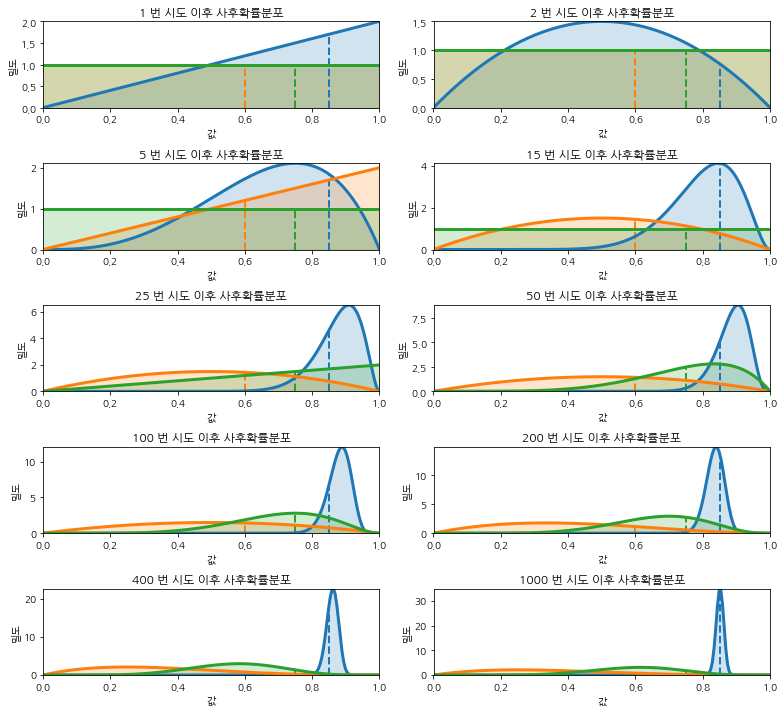

In [8]:
hidden_prob = np.array([0.85, 0.60, 0.75])
bandits = Bandits(hidden_prob)
bayesian_strat = BayesianStrategy(bandits)

draw_samples = [1, 1, 3, 10, 10, 25, 50, 100, 200, 600]

for j, i in enumerate(draw_samples):
    plt.subplot(5, 2, j + 1)
    bayesian_strat.sample_bandits(i)
    plot_priors(bayesian_strat, hidden_prob)
    # plt.legend()
    plt.autoscale(tight=True)
    plt.xlabel('값')
    plt.ylabel('밀도')
plt.tight_layout()

### 6.4.3 적합의 척도

베이지안 밴디트는 최대의 승률을 가진 밴디트를 고르는 것이다. 최고의 밴디트 승률을 $w_{opt}$라고 표시하자. 우리의 점수는 처음부터 최고의 밴디트를 선택하여 우리가 얼마나 잘 해왔는지와 비교해야 한다. 따라서 전략의 **총 손실**(total regret)에 대한 정의가 필요하다.

총 손실은 최적의 전략(항상 최고의 성공확률을 가진 밴디트를 고르는)을 선택한 $T$라운드 후 성과와 또 다른 전략을 선택하는 $T$라운드 후 성과의 차이로 정의할 수 있다. 

$$
\begin{eqnarray} R_T & = & \sum_{i=1}^{T}{\left( w_{opt} - w_{B(i)} \right)} \\  & = & Tw^{*} - \sum_{i=1}^{T}{w_{B(i)}} \end{eqnarray}
$$

이 식에서 $w_{B(i)}$는 $i$번째 라운드 후 선택된 밴디트의 성공(prize)확률이다. 총 손실 0은 그 전략이 가능한 최고의 점수를 달성한다는 것을 의미한다.

1. **랜덤(random)**:	시험할	밴디트를	임의로	선택한다.	선택을	하지	못하면	중단한다.
2. **최대	베이지안	신용범위(largest Bayesian credible bound)**:	해당	확률의	95%	신용범위	내	최대구간을	가진	밴디트를	선택한다.
3. **베이지안-UCB	알고리즘(Bayes-UCB algorithm)**:	가장	큰	점수를	가진	밴디
트를	선택한다.	그	점수는	사후확률의	동적인	4분위수	값이다.
4. **사후확률의	평균(mean of posterior)**:	가장	큰	사후확률	평균을	가진	밴디트를	선택한다.	이것이	인간	참여자가	할	법한	전략이다.
5. **최대비율(largest proportion)**:	현재	최대의	관측승률을	가진	밴디트를	선택한다.

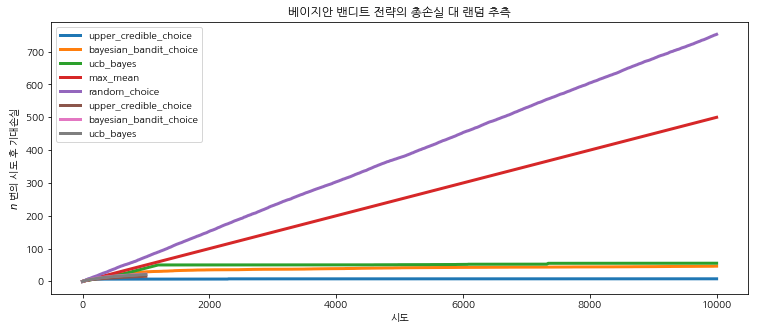

In [9]:
figsize(12.5, 5)
from other_strats import GeneralBanditStrat, bayesian_bandit_choice, max_mean, lower_credible_choice, \
                         upper_credible_choice, random_choice, ucb_bayes, Bandits

# define a harder problem
# 더 어려운 문제 정의
hidden_prob = np.array([0.15, 0.2, 0.1, 0.05])
bandits = Bandits(hidden_prob)

# define regret
# 손실 정의

def regret(probabilities, choices):
    w_opt = probabilities.max()
    return (w_opt - probabilities[choices.astype(int)]).cumsum()

# create new strategies
# 새 전략 생성
strategies = [upper_credible_choice,
              bayesian_bandit_choice,
              ucb_bayes,
              max_mean,
              random_choice]
algos = []
for strat in strategies:
    algos.append(GeneralBanditStrat(bandits, strat))
# train 10000 times
# 10,000번 훈련
for strat in algos:
    strat.sample_bandits(10000)

#test and plot
# 테스트하고 작도한다
for i, strat in enumerate(algos):
    _regret = regret(hidden_prob, strat.choices)
    plt.plot(_regret, label=strategies[i].__name__, lw=3)

plt.title("베이지안 밴디트 전략의 총손실 대 랜덤 추측")
plt.xlabel("시도")
plt.ylabel("$n$ 번 시도 후 손실");
plt.legend(loc="upper left");

# this can be slow, so I recommend NOT running it.
# 다음 이하는 시간이 걸릴 수 있다. 그래서 실행을 권하진 않는다
trials = 200
expected_total_regret = np.zeros((1000, 3))

for i_strat, strat in enumerate(strategies[:-2]):
    for i in range(trials):
        general_strat = GeneralBanditStrat(bandits, strat)
        general_strat.sample_bandits(1000)
        _regret = regret(hidden_prob, general_strat.choices)
        expected_total_regret[:, i_strat] += _regret

    plt.plot(expected_total_regret[:, i_strat] / trials, lw=3, label=strat.__name__)

#plt.title("MAB(Multi-armed Bandit)전략의 기대손실")
plt.xlabel("시도")
plt.ylabel("$n$ 번의 시도 후 기대손실");
plt.legend(loc="upper left");

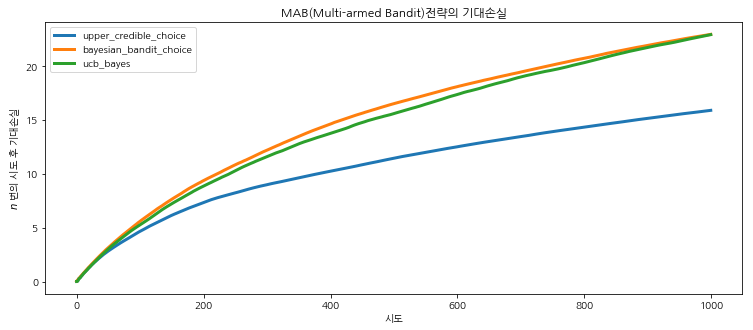

In [10]:
# this can be slow, so I recommend NOT running it.
# 아래는 시간이 걸릴 수 있어 실행하는 걸 권하진 않는다
trials = 200
expected_total_regret = np.zeros((1000, 3))

for i_strat, strat in enumerate(strategies[:-2]):
    for i in range(trials):
        general_strat = GeneralBanditStrat(bandits, strat)
        general_strat.sample_bandits(1000)
        _regret = regret(hidden_prob, general_strat.choices)
        expected_total_regret[:, i_strat] += _regret

    plt.plot(expected_total_regret[:, i_strat] / trials, lw=3, label=strat.__name__)

plt.title("MAB(Multi-armed Bandit)전략의 기대손실")
plt.xlabel("시도")
plt.ylabel("$n$ 번의 시도 후 기대손실");
plt.legend(loc="upper left");

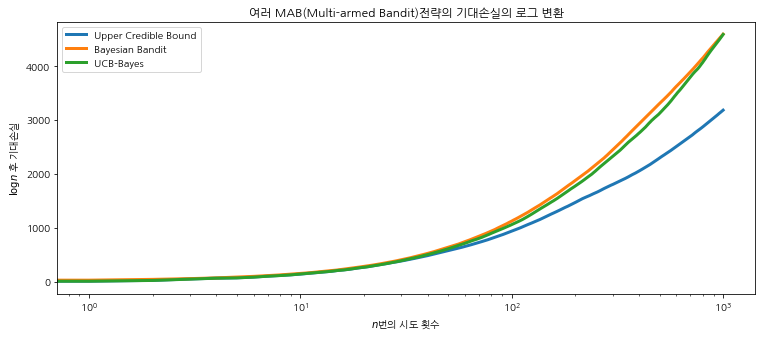

In [11]:
plt.figure()
[pl1, pl2, pl3] = plt.plot(expected_total_regret[:, [0, 1, 2]], lw=3)
plt.xscale("log")
plt.legend([pl1, pl2, pl3],
           ["Upper Credible Bound", "Bayesian Bandit", "UCB-Bayes"],
           loc="upper left")

plt.xlabel("$n$번의 시도 횟수")
plt.ylabel("$\log{n}$ 후 기대손실")
plt.title("여러 MAB(Multi-armed Bandit)전략의 기대손실의 로그 변환");

### 6.4.4 알고리즘 확장하기

베이지안 밴디트 알고리즘의 간결함 덕분에 알고리즘을 확장하기도 쉽다. 어떤 것이 가능한지는 다음과 같다.
- **최소확률**(예를 들어 어떤 위치에서 상금이 안 좋은가)에 관심이 있다면 간단히 $B = \arg \min X_b$를 선택하고 처리한다.
- **학습률(learning rate) 추가하기**: 현재의 기본 환경이 시간에 따라 변한다고 가정해보자. 기술적으로 표준 베이지안 밴디트 알고리즘은 최선이라고 생각하던 것이 더 자주 실패하기 시작하는 것에 주목하고 스스로 업데이트할 것이다. 우리는 간단히 업데이트 시 rate 항을 추가함으로써 알고리즘이 환경변화를 재빨리 인지하도록 알고리즘을 재촉할 수 있다.

```python
self.wins[ choice ] = rate*self.wins[ choice ] + result
self.trials[ choice ] = rate*self.trials[ choice ] + 1
```

만일 `rate < 1`이면 알고리즘은 이전 획득을 더 빨리 버리고, 아무것도 모르는상태 쪽으로 하락압력이 생길 것이다.

[ 0.0856952   0.0060484   0.00193762  0.01988472  0.07703961  0.07842721
  0.01323801  0.1665972   0.04568794  0.15655707  0.05310485  0.10446545
  0.08577498  0.35834449  0.30699475  0.0040753   0.02752378  0.1103307
  0.00793672  0.00723425  0.06064578  0.03774649  0.07966523  0.1023573
  0.10247293  0.18782564  0.0076663   0.08343105  0.03109625  0.00809249
  0.13055036  0.24271313  0.15796827  0.04984505  0.02587424]


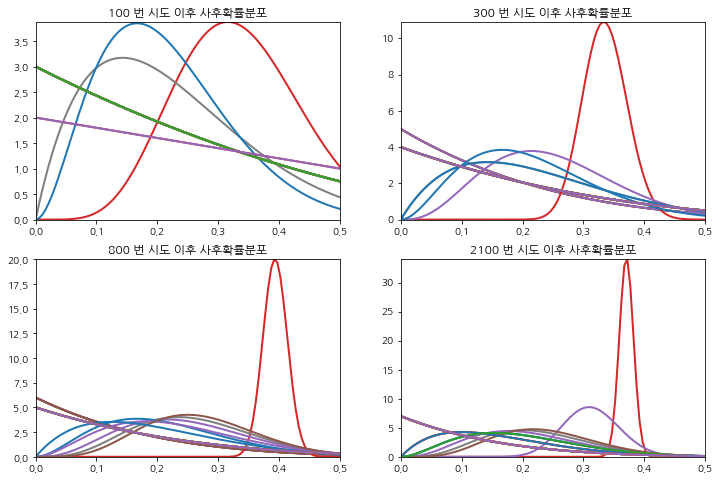

In [12]:
figsize(12.0, 8)
beta = stats.beta
hidden_prob = beta.rvs(1,13, size=35)
print (hidden_prob)
bandits = Bandits(hidden_prob)
bayesian_strat = BayesianStrategy(bandits)
for j,i in enumerate([100, 200, 500, 1300]):
    plt.subplot(2, 2, j+1)
    bayesian_strat.sample_bandits(i)
    plot_priors(bayesian_strat, hidden_prob, lw = 2, alpha = 0.0,
        plt_vlines=False)
    plt.xlim(0, 0.5)

## 6.5 해당 분야 전문가로부터 사전확률분포 유도하기

실무자들의 전문 지식을 수학적 틀에 통합하는 것이 주관적인 사전확률분포를 명시하는 방법이다. 전문 지식을 통합하는 것은 여러 가지 이유로 유용하다.

- 전문 지식은 MCMC 수렴 속도를 높인다. 예를 들어 미지의 모수가 양수임이 확실하다면 거기에 관심을 집중하여 음의 값을 탐색하는 시간 낭비를 줄일 수 있다.
- 더 정확한 추론을 가능하게 한다. 진짜 모수값 근처의 사전확률의 값에 더 높은 가중을 둠으로써 우리는 추론을 최종적으로 좁혀간다(사후확률을 미지의 값 주변에 촘촘하게 모아서).
- 불확실성을 더 잘 표현한다.

비전문가가 사전확률분포를 유도하는 것은 특히 어렵다. 전문가도 어려운 확률분포, 사전확률분포 등의 개념을 도입하는 대신 다음 절에서는 훨씬 간단한 대안을 소개하겠다.

### 6.5.1 트라이얼 룰렛법

트라이얼 룰렛법은 전문가가 생각하기에 가능한 결과에 카운터(카지노의 칩에 해당)를 배치함으로써 사전확률분포를 만드는 데 초점을 두고 있다. 전문가에게 카운터 $N$개(예를 들어 $N = 20$)가 주어지고, 이를 미리 인쇄된 격자에 두도록 한다. 격자의 빈(bin)은 간격(intervals)을 의미한다.

![](./images/roulette.PNG)

이것으로 우리는 전문가의 선택을 맞출 수 있는 분포를 재단할 수 있다. 이 기술을 선호하는 데는 몇 가지 이유가 있다.

- 전문가에게 연이은 질문 공세를 펼 필요 없이, 전문가의 주관적인 확률분포 모습에 대한 여러 가지 의문을 해소할 수 있다. 통계 전문가는 특정포인트 이하의 밀도 또는 특정 포인트 간 밀도를 간단히 알 수 있다.
- 사전확률분포를 만드는 과정에서 전문가는 최초로 칩을 배치한 방법에 만족하지 못하면 칩을 이동할 수 있다. 그래서 전문가는 최종 결과를 확실하게 제출할 수 있다.
- 이 방법은 전문가가 제시된 분포집합에 시종일관 논리적이게 만든다. 만일 모든 칩을 사용한다면 그 확률의 합은 1이어야 한다.
- 그래픽 방법은 특히 통계적 지식이 뛰어나지 않은 실무자에게 좀 더 정확한 결과를 제시할 수 있다.

### 6.5.2 예제: 주식수익률

$S_t$가 $t$영업일의 주가라면 $t$일의 일간수익률은 다음과 같다.

$$
r_t = \frac{S_t - S_{t-1}}{S_{t-1}}
$$

주식의 **일간기대수익률**은 $\mu = E[r_t]$로 계산된다.

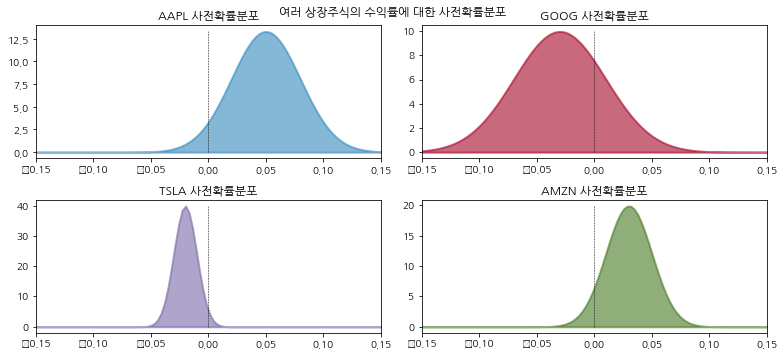

In [15]:
figsize(11., 5)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

normal = stats.norm
x = np.linspace(-0.15, 0.15, 100)

expert_prior_params = {"AAPL": (0.05, 0.03),
                       "GOOG": (-0.03, 0.04),
                       "TSLA": (-0.02, 0.01),
                       "AMZN": (0.03, 0.02),
                       }

for i, (name, params) in enumerate(expert_prior_params.items()):
    plt.subplot(2, 2, i + 1)
    y = normal.pdf(x, params[0], scale=params[1])
    #plt.plot( x, y, c = colors[i] )
    plt.fill_between(x, 0, y, color=colors[i], linewidth=2,
                     edgecolor=colors[i], alpha=0.6)
    plt.title(name + " 사전확률분포")
    plt.vlines(0, 0, y.max(), "k", "--", linewidth=0.5)
    plt.xlim(-0.15, 0.15)

plt.tight_layout()
plt.suptitle("여러 상장주식의 수익률에 대한 사전확률분포");

In [16]:
import pymc as pm

n_observations = 100  # 가장 최근 100일만 다룬다

prior_mu = np.array([x[0] for x in expert_prior_params.values()])
prior_std = np.array([x[1] for x in expert_prior_params.values()])

inv_cov_matrix = pm.Wishart("inv_cov_matrix", n_observations, np.diag(prior_std ** 2))
mu = pm.Normal("returns", prior_mu, 1, size=4)

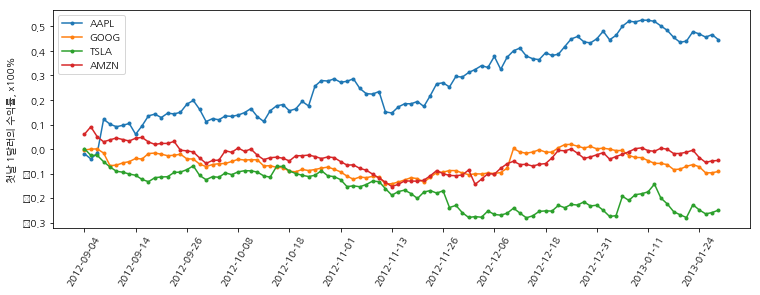

In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import pandas as pd
import numpy as np
import datetime

matplotlib.rc('font', family='NanumGothic')  # Linux

stocks = ["AAPL", "GOOG", "TSLA", "AMZN"]

enddate = "2015-04-27"
startdate = "2012-09-01"

stock_closes = {}
stock_returns = {}
n_observations = 100

for stock in stocks:
    df = pd.read_csv('data/%s.csv' % stock, names=['Date','Open','High','Low','Close','Adj Close','Volume'], header=0)
    x = np.array(df)    
    stock_closes[stock] = x[:,5].astype(float)   

# create returns:
# 수익률 계산
for stock in stocks:
    _previous_day = np.roll(stock_closes[stock], -1)
    stock_returns[stock] = ((stock_closes[stock] - _previous_day) / _previous_day)[:n_observations]

dates = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"), x[1:n_observations + 1, 0]))

figsize(12.5, 4)

for _stock, _returns in stock_returns.items():
    p = plt.plot((1 + _returns)[::-1].cumprod() - 1, '-o', label="%s" % _stock,
                 markersize=4, markeredgecolor="none")

plt.xticks(np.arange(100)[::8],
    list(map(lambda x: datetime.datetime.strftime(x, "%Y-%m-%d"), dates[::8])),
    rotation=60);


plt.legend(loc="upper left")
#plt.title("주식수익률")
plt.ylabel("첫날 1달러의 수익률, x100%");
plt.show()

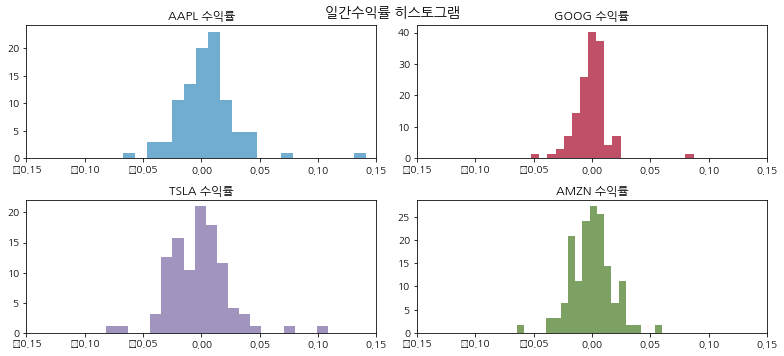

In [27]:
figsize(11.0, 5)
returns = np.zeros((n_observations, 4))
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]
for i, (_stock, _returns) in enumerate(stock_returns.items()):
    returns[:, i] = _returns
    plt.subplot(2, 2, i+1)
    plt.hist(_returns, bins=20,
             density=True, histtype="stepfilled",
             color=colors[i], alpha=0.7)
    plt.title(_stock + " 수익률")
    plt.xlim(-0.15, 0.15)

plt.tight_layout()
plt.suptitle("일간수익률 히스토그램", size=14);

In [28]:
obs = pm.MvNormal("observed returns", mu, inv_cov_matrix, observed=True, value=returns)

model = pm.Model([obs, mu, inv_cov_matrix])
mcmc = pm.MCMC()

mcmc.sample(150000, 100000, 3)

/home/cjh/anaconda3/envs/study/lib/python3.6/site-packages/pymc/Model.py:94: UserWarning: The MCMC() syntax is deprecated. Please pass in nodes explicitly via M = MCMC(input).
  'The MCMC() syntax is deprecated. Please pass in nodes explicitly via M = MCMC(input).')


 [-----------------100%-----------------] 150000 of 150000 complete in 95.4 sec

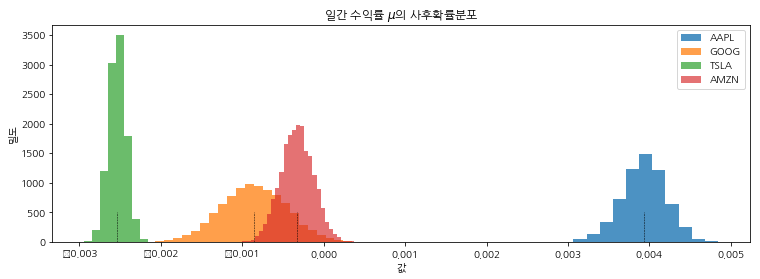

In [30]:
figsize(12.5, 4)

# examine the mean return first.
# 우선 평균수익률을 확인한다
mu_samples = mcmc.trace("returns")[:]

for i in range(4):
    plt.hist(mu_samples[:, i], alpha=0.8 - 0.05 * i, bins=30,
             histtype="stepfilled", density=True,
             label="%s" % list(stock_returns.keys())[i])

plt.vlines(mu_samples.mean(axis=0), 0, 500, linestyle="--", linewidth=.5)

plt.title("일간 수익률 $\mu$의 사후확률분포")
plt.xlabel('값')
plt.ylabel('밀도')
plt.legend();

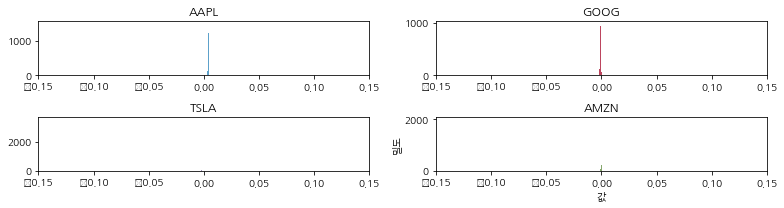

In [32]:
figsize(11.0, 3)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.hist(mu_samples[:, i], alpha=0.8 - 0.05 * i, bins=30,
             histtype="stepfilled", density=True, color=colors[i],
             label="%s" % list(stock_returns.keys())[i])
    plt.title("%s" % list(stock_returns.keys())[i])
    plt.xlim(-0.15, 0.15)

#plt.suptitle("일간 수익률의 사후확률분포")
plt.xlabel('값')
plt.ylabel('밀도')
plt.tight_layout()

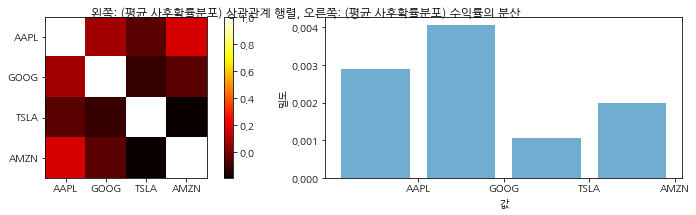

In [33]:
inv_cov_samples = mcmc.trace("inv_cov_matrix")[:]
mean_covariance_matrix = np.linalg.inv(inv_cov_samples.mean(axis=0))
def cov2corr(A):
    """
    covariance matrix to correlation matrix
    """
    """
    공분산행렬을 상관행렬로 변환
    """
    d = np.sqrt(A.diagonal())
    A = ((A.T/d).T)/d
    return A
plt.subplot(1,2,1)
plt.imshow(cov2corr(mean_covariance_matrix), interpolation="none",
    cmap = plt.cm.hot)
plt.xticks(np.arange(4), stock_returns.keys())
plt.yticks(np.arange(4), stock_returns.keys())
plt.colorbar(orientation="vertical")
#plt.title("(평균 사후확률분포) 상관관계 행렬")
plt.subplot(1,2,2)
plt.bar(np.arange(4), np.sqrt(np.diag(mean_covariance_matrix)),
    color="#348ABD", alpha=0.7)
plt.xticks(np.arange(4) + 0.5, stock_returns.keys());
#plt.title("(평균 사후확률분포) 수익률의 분산")
plt.xlabel('값')
plt.ylabel('밀도')
plt.tight_layout()
plt.suptitle("왼쪽: (평균 사후확률분포) 상관관계 행렬, 오른쪽: (평균 사후확률분포) 수익률의 분산");

## 6.6 켤레 사전확률분포

$$
\overbrace { \text{베타} }^{ \text{사전확률분포} } \cdot \overbrace { \text{이항} }^{ \text{데이터} } =\overbrace { \text{베타} }^{ \text{사후확률분포} } 
$$

사후확률분포는 폐쇄형 방정식(Closed-form function, 항상 명확한 값을 제공)이기 때문에 MCMC를 사용하지 않아도 추론과 분석이 가능하다. 이것이 베이지안 밴디트 알고리즘의 핵심이라고 한다. 

위와 같은 형태를 가지는 비슷한 분포들이 존재한다. 

$X$가 잘 알려진 분포($f_{\alpha}$)에서 나왔다고 가정하자. 여기서 $\alpha$는 $f$의 미지의 모수다($f$는 정규분포이거나 이항분포일 수 있다). 특정한 분포 $f_{\alpha}$에 대해 다음과 같은 사전확률분포 $p_{\beta}$가 존재할 수 있다.

$$
\overbrace { p_{\beta} }^{ \text{사전확률분포} } \cdot \overbrace { f_{\alpha}(X) }^{ \text{데이터} } =\overbrace { p_{\beta '} }^{ \text{사후확률분포} } 
$$

여기서 $\beta '$는 여러가지 모수들의 집합이다. 사전확률분포 $p$는 이러한 관계를 만족시키며 **켤레 사전확률분포**라고 한다. 이러한 분포는 MCMC를 사용하지 않고 바로 사후확률분포를 추론할 수 있다.

하지만, 켤레 사전확률분포에는 몇 가지 이슈가 있다.

- 켤레 사전확률분포는 객관적인 사전확률분포는 아니다. 그래서 주관적인 사전확률분포가 필요한 경우에만 유용하다. 켤레 사전확률분포는 실무자의 주관적인 의견을 수용할 수 있다는 보장이 없다.
- 전형적으로 켤레 사전확률분포는 단순하고 1차원적인 문제에만 존재한다. 복잡한 구조로 된 좀더 큰 문제의 경우 켤레 사전확률분포를 찾을 거라는 보장이 없다.

## 6.7 제프리 사전확률분포

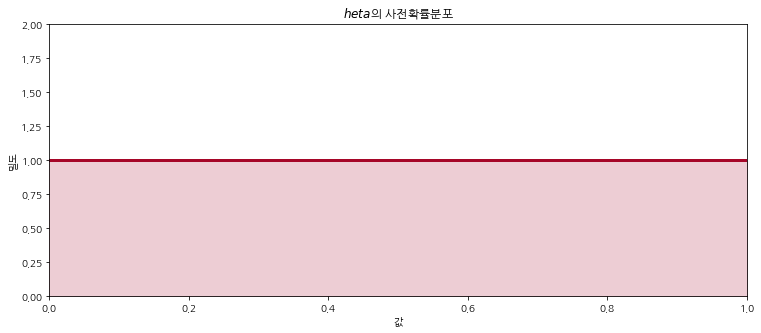

In [4]:
figsize(12.5, 5)
x = np.linspace(0.000, 1, 150)
y = np.linspace(1.0, 1.0, 150)
lines = plt.plot(x, y, color="#A60628", lw=3)
plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
plt.autoscale(tight=True)
plt.xlabel('값')
plt.ylabel('밀도')
plt.ylim(0, 2)
plt.title("$\theta$의 사전확률분포");

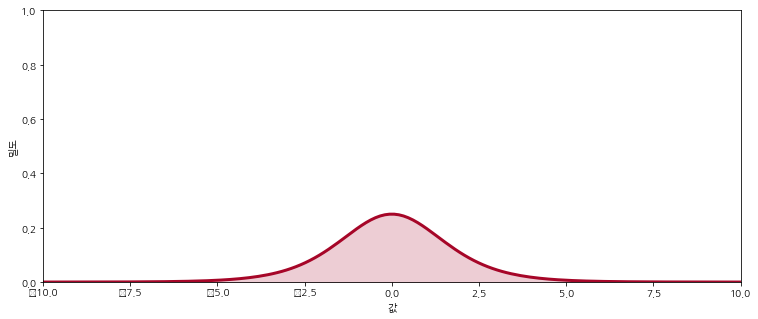

In [5]:
figsize(12.5, 5)
psi = np.linspace(-10, 10, 150)
y = np.exp(psi) / (1 + np.exp(psi))**2
lines = plt.plot(psi, y, color="#A60628", lw = 3)
plt.fill_between(psi, 0, y, alpha = 0.2, color = lines[0].get_color())
plt.autoscale(tight=True)
plt.xlabel('값')
plt.ylabel('밀도')
plt.ylim(0, 1);

## 6.8 $N$이 증가할 때 사전확률분포의 효과

[1장 - 베이지안 추론의 철학](https://github.com/ExcelsiorCJH/Bayesian-with-Python/blob/master/Chap01-Introduction/Chap01-Introduction.ipynb)에서 우리가 가지고 있는 관측치, 즉 데이터의 양이 증가할수록 사전확률분포의 중요성은 약해진다는 것을 알아보았다. 그 이유는 사전확률분포는 이전의 정보에 기반을 두고 있고, 충분한 양의 새로운 정보(데이터)는 이러한 이전 정보의 가치를 상쇄시키기 때문이다.

다음 수식에서 데이터셋을 $X$라고 할 때 모수 $\theta$에 대한 사후확률분포는 다음과 같다.

$$
p\left( { \theta }|{ X } \right) \propto \underbrace { p\left( { X }|{ \theta } \right) }_{ \text{우도} }  \cdot  \overbrace { p(\theta) }^{ \text{사전확률분포} } 
$$

아래의 예제코드는 데이터가 증가함에 따라 사전확률분포의 영향력이 감소하는 것을 그래프로 나타낸 것이다.

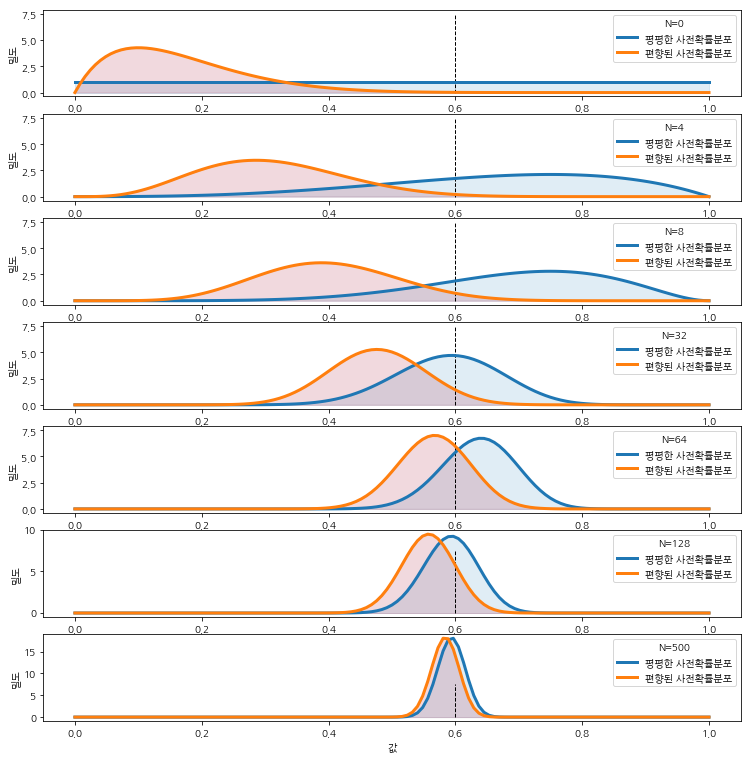

In [9]:
figsize(12.5, 15)

p = 0.6
beta1_params = np.array([1., 1.])
beta2_params = np.array([2, 10])
beta = stats.beta

x = np.linspace(0.00, 1, 125)
data = pm.rbernoulli(p, size=500)

plt.figure()
for i, N in enumerate([0, 4, 8, 32, 64, 128, 500]):
    s = data[:N].sum()
    plt.subplot(8, 1, i + 1)
    params1 = beta1_params + np.array([s, N - s])
    params2 = beta2_params + np.array([s, N - s])
    y1, y2 = beta.pdf(x, *params1), beta.pdf(x, *params2)
    plt.plot(x, y1, label=r"평평한 사전확률분포", lw=3)
    plt.plot(x, y2, label="편향된 사전확률분포", lw=3)
    plt.fill_between(x, 0, y1, color="#348ABD", alpha=0.15)
    plt.fill_between(x, 0, y2, color="#A60628", alpha=0.15)
    plt.legend(title="N=%d" % N)
    plt.vlines(p, 0.0, 7.5, linestyles="--", linewidth=1)
    plt.xlabel('값')
    plt.ylabel('밀도')
#     plt.title("더 많은 정보에 따른 사후확률분포(여러 사전 확률)의 수렴도")
#     plt.ylim( 0, 10)#

## 6.9 결론

이 장에서는 사전확률분포 사용법을 재평가해보았다. 사전확률분포는 우리의모델에 추가할 또 다른 목표이며 주의 깊게 선택해야 한다.